In [10]:
import pygmt
import glob
import os.path as osp

In [11]:
# config formatting
pygmt.config(FONT='Times-Roman')
pygmt.config(FONT_LABEL='Times-Roman,12p')

In [12]:
# Directory where data is kep
slab2dir = "../../data/Slab2/"

# Make a color palette file
cptfile = "slabdepth.cpt"
pygmt.makecpt(cmap="romaO", series=(-700, 0, 100), output=cptfile, reverse=True)

In [13]:
# Basic global map with topography for reference location
fig = pygmt.Figure()
fig.basemap(region="d", projection="W180/15c", frame=True)
grid = pygmt.datasets.load_earth_relief(resolution="10m", registration="gridline")
fig.grdimage(grid=grid, cmap='gray')
fig.coast(shorelines="1/0.5p,black")

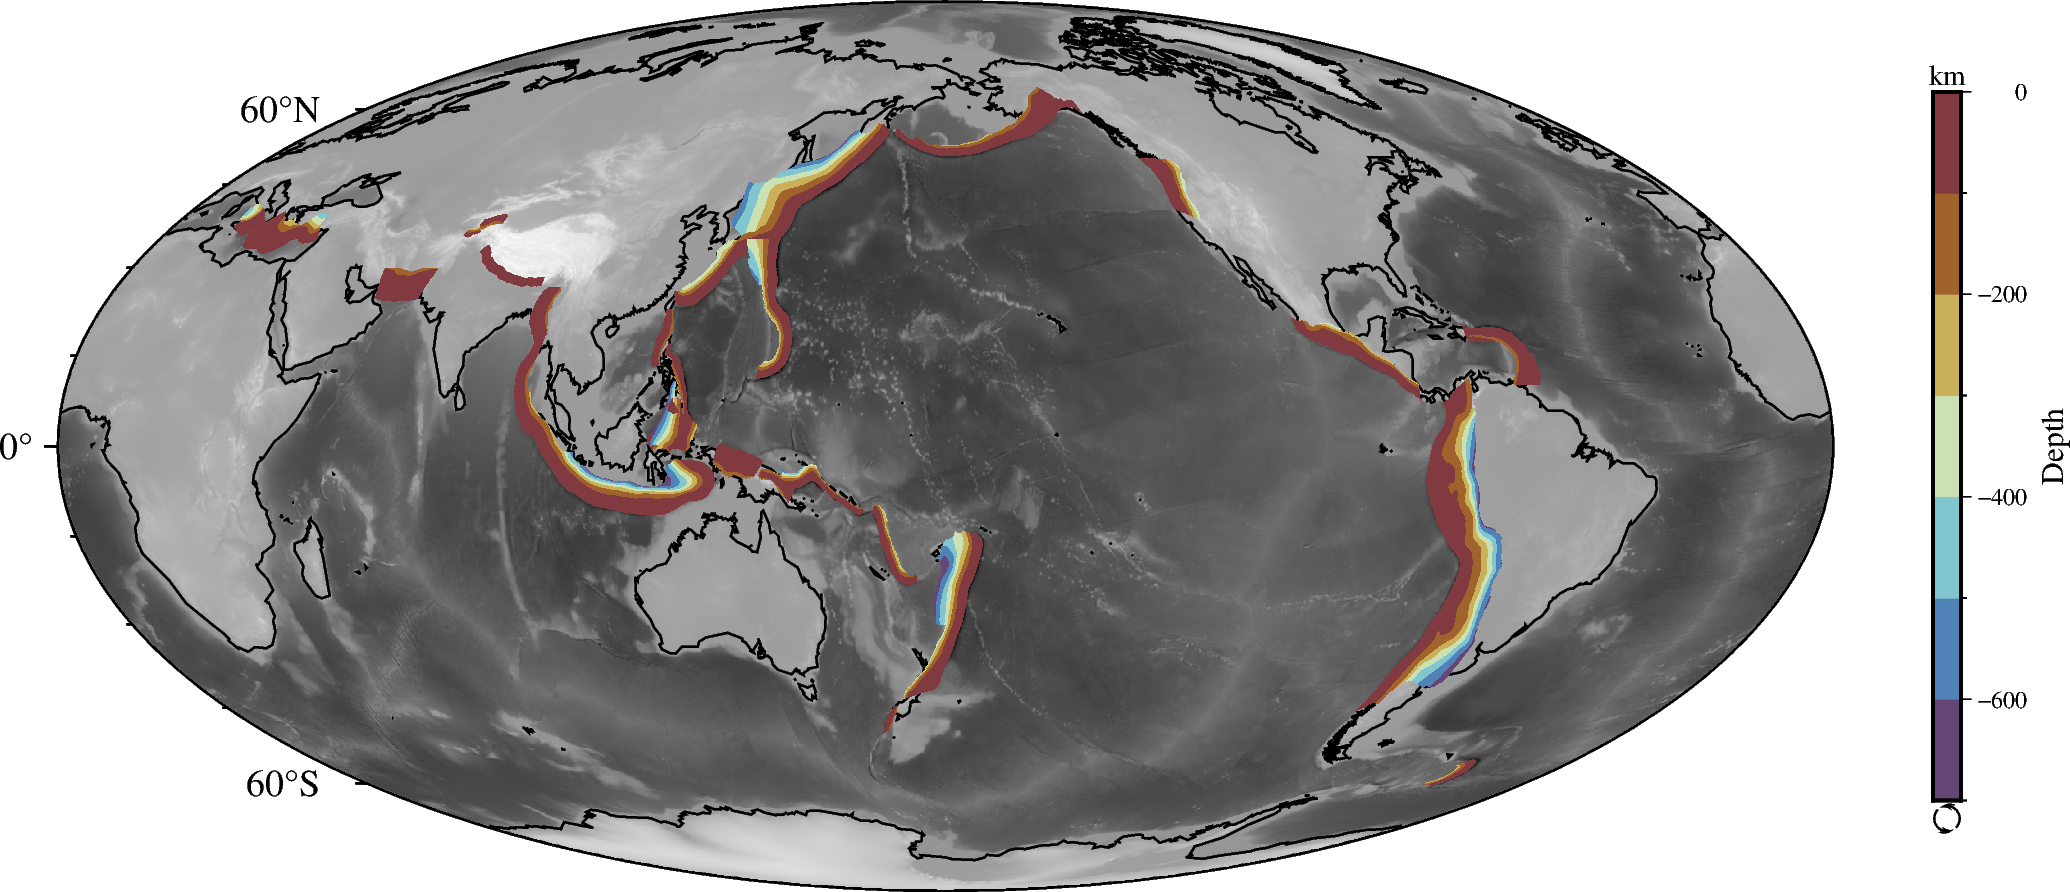

In [14]:
# Loop through each slab in the data set and add to the figure using grdimage
for file in glob.glob(osp.join(slab2dir, "*dep*.grd")):
    fig.grdimage(grid=file, cmap=cptfile, nan_transparent=True)

# add a colorbar for depth
fig.colorbar(cmap=cptfile, position="JMR", box=False, frame=["x+lDepth", "y+lkm"])

fig.show()